# Part 1: Data Acquisition


In [1]:
from bs4 import BeautifulSoup
import urllib.request
import time
#Time source: https://www.geeksforgeeks.org/how-to-make-a-python-program-wait/

#Target Pages
# page1 = 'https://news.ycombinator.com/news'
# page2 = 'https://news.ycombinator.com/news?p=2'
# page3 = 'https://news.ycombinator.com/news?p=3'
# page4 = 'https://news.ycombinator.com/news?p=4'
# page5 = 'https://news.ycombinator.com/news?p=5'

listOfURLs = ['https://news.ycombinator.com/news', 'https://news.ycombinator.com/news?p=2', 'https://news.ycombinator.com/news?p=3', 'https://news.ycombinator.com/news?p=4', 'https://news.ycombinator.com/news?p=5']

def extractPages(list):
    print('Begining HTML Page Extraction...')
    pageNumber = 1
    toReturn = []
    for website in list:
        pageName = 'HackerNews_Page_' + str(pageNumber) + '.html'
        with urllib.request.urlopen(website) as response:
            htmlResponse = response.read()
            htmlResponse = htmlResponse.decode('utf-8')
        with open(pageName, 'w') as new_file:
            new_file.write(htmlResponse)
            new_file.close()
        pageNumber += 1
        toReturn.append(pageName)
        time.sleep(30)
    return toReturn


extractedFiles = extractPages(listOfURLs)
print('HTML Page Extraction Complete')

Begining HTML Page Extraction...
HTML Page Extraction Complete


In [14]:
import pandas as pd

#source substring in python: freecodecamp.org/news/how-to-substring-a-string-in-python
#source pandas stuff: pandas.pydata.org/pandas-docs/stable/refernce/api/pandas.DatFrame.html

def makeBeautifulSoup(list):
    toReturn = []
    for html in list:
        ingredients = open(html, 'r+')
        toReturn.append(BeautifulSoup(ingredients, 'html.parser'))
        ingredients.close()
    return toReturn

def extractHTMLData(list):
    grabTitles = []
    grabRank = []
    grabAge = []
    grabPoints = []
    grabCommentNumber = []
    for item in list:
        for x in [x.get_text() for x in item.select('.title .storylink')]:
            grabTitles.append(x)

        for x in [int(x.get_text()[:-1]) for x in item.select('.rank')]:
            grabRank.append(x)

        for x in [x.get_text()[:-4] for x in item.select('.age')]:
            if x.__contains__('h'):
                splitString = x.split()
                grabAge.append(float(splitString[0]))
            elif x.__contains__('min'):
                splitString = x.split()
                grabAge.append(float(splitString[0])/60.0)
            elif x.__contains__('d'):
                splitString = x.split()
                grabAge.append(float(splitString[0]) * 24.0)

        for x in [x.get_text() for x in item.select('.subtext')]:
            if x.__contains__('points'):
                splitString = x.split()
                grabPoints.append(int(splitString[0]))
            else:
                grabPoints.append(0)
            if x.__contains__('comment'):
                splitString = x.split()
                grabCommentNumber.append(int(splitString[-2:-1][0]))
            else:
                grabCommentNumber.append(0)
    grabTitleLength = [len(x) for x in grabTitles]

    return pd.DataFrame({'Title' : grabTitles, 'TitleLength' : grabTitleLength, 'Rank' : grabRank, 'Age' : grabAge, 'Points' : grabPoints, 'NumComments' : grabCommentNumber}) 


cleanedUpData = extractHTMLData(makeBeautifulSoup(extractedFiles))

display(cleanedUpData)

,Title,TitleLength,Rank,Age,Points,NumComments
0,Few people know that Google voluntarily remove...,67,1,8.0,495,214
1,Finding a CPU Design Bug in the Xbox 360 (2018),47,2,3.0,96,12
2,Multicore OCaml: May 2021,25,3,3.0,56,9
3,Reverse Engineering Bumble’s API (2020),39,4,1.0,21,4
4,Containers Are Tents,20,5,3.0,51,24
...,...,...,...,...,...,...
145,TC Energy scraps Keystone XL pipeline project ...,76,146,48.0,309,411
146,A robot to replace the need for farmers to go ...,66,147,24.0,180,126
147,What would you pay for autonomous driving? Vol...,74,148,48.0,215,681
148,The brain isn’t supposed to change this much,44,149,48.0,193,174


# Part 2: Regression

In [25]:
import statsmodels.formula.api as sm

regression1 = sm.ols(formula="Rank ~ Age", data=cleanedUpData).fit()
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     70.98
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           2.92e-14
Time:                        23:15:04   Log-Likelihood:                -748.68
No. Observations:                 150   AIC:                             1501.
Df Residuals:                     148   BIC:                             1507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.9129      5.336      7.106      0.000      27.369      48.456
Age            2.1794      0.259      8.425      0.000       1.668       2.691
==============================================================================
Omnibus:                        7.887   Durbin-Watson:                   0.616
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                5.622
Skew:                           0.345   Prob(JB):                       0.0601
Kurtosis:                       2.349   Cond. No.                         37.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
regression2 = sm.ols(formula="Rank ~ Age + Points", data=cleanedUpData).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     61.70
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           3.50e-20
Time:                        23:12:35   Log-Likelihood:                -732.35
No. Observations:                 150   AIC:                             1471.
Df Residuals:                     147   BIC:                             1480.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.1076      4.806      8.138      0.000      29.611      48.604
Age            2.9893      0.269     11.099      0.000       2.457       3.522
Points        -0.1021      0.017     -5.980      0.000      -0.136      -0.068
==============================================================================
Omnibus:                        7.840   Durbin-Watson:                   0.869
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                6.586
Skew:                           0.424   Prob(JB):                       0.0371
Kurtosis:                       2.422   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
regression3 = sm.ols(formula="Rank ~ Age + NumComments", data=cleanedUpData).fit()
regression3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     43.30
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           1.64e-15
Time:                        23:12:13   Log-Likelihood:                -743.33
No. Observations:                 150   AIC:                             1493.
Df Residuals:                     147   BIC:                             1502.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.2948      5.169      7.215      0.000      27.079      47.510
Age             2.6792      0.293      9.153      0.000       2.101       3.258
NumComments    -0.0840      0.025     -3.299      0.001      -0.134      -0.034
==============================================================================
Omnibus:                        9.680   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.477
Skew:                           0.369   Prob(JB):                       0.0392
Kurtosis:                       2.298   Cond. No.                         296.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
regression3 = sm.ols(formula="Rank ~ Age + NumComments + Points", data=cleanedUpData).fit()
regression3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     40.99
Date:                Fri, 11 Jun 2021   Prob (F-statistic):           2.82e-19
Time:                        23:13:13   Log-Likelihood:                -732.24
No. Observations:                 150   AIC:                             1472.
Df Residuals:                     146   BIC:                             1485.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.9552      4.830      8.066      0.000      29.410      48.500
Age             3.0271      0.282     10.728      0.000       2.469       3.585
NumComments    -0.0129      0.028     -0.462      0.645      -0.068       0.042
Points         -0.0972      0.020     -4.822      0.000      -0.137      -0.057
==============================================================================
Omnibus:                        7.537   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.408
Skew:                           0.420   Prob(JB):                       0.0406
Kurtosis:                       2.434   Cond. No.                         493.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From the above the best prediction appears to come from age and points with an r^2 of 0.456. Since the coeffcient for points is negative, this seems to indicate that the articles with lower points tend to become higher ranked and the older the article is the higher the rank.


# Part 3


In [47]:
frontPage = [1 for x in cleanedUpData['Rank'] if x <= 30]
notFrontPage = [0 for x in cleanedUpData['Rank'] if x > 30]
for x in notFrontPage:
    frontPage.append(x)
cleanedUpData.insert(loc=0, value=frontPage, column='FrontPage')

In [46]:
display(cleanedUpData)

,FrontPage,Title,TitleLength,Rank,Age,Points,NumComments
0,1,Few people know that Google voluntarily remove...,67,1,8.0,495,214
1,1,Finding a CPU Design Bug in the Xbox 360 (2018),47,2,3.0,96,12
2,1,Multicore OCaml: May 2021,25,3,3.0,56,9
3,1,Reverse Engineering Bumble’s API (2020),39,4,1.0,21,4
4,1,Containers Are Tents,20,5,3.0,51,24
...,...,...,...,...,...,...,...
145,0,TC Energy scraps Keystone XL pipeline project ...,76,146,48.0,309,411
146,0,A robot to replace the need for farmers to go ...,66,147,24.0,180,126
147,0,What would you pay for autonomous driving? Vol...,74,148,48.0,215,681
148,0,The brain isn’t supposed to change this much,44,149,48.0,193,174


In [62]:
front_Page_made = sm.logit(formula='FrontPage ~ Age + Points', data=cleanedUpData).fit()
front_Page_made.summary()

Optimization terminated successfully.
         Current function value: 0.278007
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              FrontPage   No. Observations:                  150
Model:                          Logit   Df Residuals:                      147
Method:                           MLE   Df Model:                            2
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.4444
Time:                        23:49:24   Log-Likelihood:                -41.701
converged:                       True   LL-Null:                       -75.060
Covariance Type:            nonrobust   LLR p-value:                 3.253e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7634      0.566      3.114      0.002       0.653       2.873
Age           -0.3748      0.073     -5.120      0.000      -0.518      -0.231
Points         0.0088      0.002      3.979      0.000       0.004       0.013
==============================================================================
"""

In [67]:
front_Page_made = sm.logit(formula='FrontPage ~ Age', data=cleanedUpData).fit()
front_Page_made.summary()

Optimization terminated successfully.
         Current function value: 0.346516
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              FrontPage   No. Observations:                  150
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Jun 2021   Pseudo R-squ.:                  0.3075
Time:                        00:06:44   Log-Likelihood:                -51.977
converged:                       True   LL-Null:                       -75.060
Covariance Type:            nonrobust   LLR p-value:                 1.086e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3098      0.484      2.704      0.007       0.360       2.259
Age           -0.2231      0.045     -4.950      0.000      -0.311      -0.135
==============================================================================
"""

Text(0.5, 1.0, 'Age Predicting appearance on Front Page')

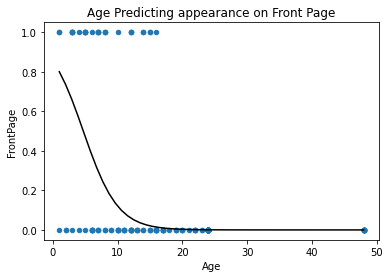

In [66]:
import matplotlib.pyplot as plt
import numpy as np
cleanedUpData.plot.scatter(x='Age', y='FrontPage')

logistic = lambda x: 1/(1+np.exp(-x))

x = np.linspace(cleanedUpData['Age'].min(),cleanedUpData['Age'].max())
par = dict(front_Page_made.params)
plt.plot(x, logistic(par['Intercept'] + par['Age'] * x), color='Black')
plt.title('Age Predicting appearance on Front Page')

# So From the graph and data it appears that the age of the article is the best at predicting the apperaance on the front page. A combintation of Age and Points made a decient prdiction as well...